<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import Packages</a></span></li></ul></li><li><span><a href="#Data-Wrangling-&amp;-Cleaning" data-toc-modified-id="Data-Wrangling-&amp;-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling &amp; Cleaning</a></span></li></ul></div>

# Holiday Package Prediction

### Introduction

### Import Packages

In [194]:
from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Travel'

In [195]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Travel/Data')

In [196]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

import sys

In [197]:
# Visualizations libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

## Data Wrangling & Cleaning

In [258]:
df = pd.read_csv(path/'Travel.csv')
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

We have unbalanced data which has 18% of products taken. When we choose the metrics for our model, we need to keep this in mind. Probably I will choose f1-beta score with some weight

In [225]:
df['ProdTaken'].sum()/len(df['ProdTaken'])

0.18821603927986907

There are 8 columns that have missing values. Missing values are not heavy in this dataset, so I will fill nan with median for numerical variables, with 'unknown' for categorical variables.

In [226]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

DurationOfPitch             0.051350
MonthlyIncome               0.047668
Age                         0.046236
NumberOfTrips               0.028642
NumberOfChildrenVisiting    0.013502
NumberOfFollowups           0.009206
PreferredPropertyStar       0.005319
TypeofContact               0.005115
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

- There are some missing data in dataset. I need to think how to deal with. (Probably fill nan with median and create columns that show nan info)

- MonthlyIncome: we can make it as an categorical variable by using `map` with 5 ranks (very low, low, medium, high, very high)
- Age: we can make it as an categorical variable with 10's, 20's and so on..... 

- NumberOfFollowups: this could be an discrete variable by changing dtypes to int
- PreferredPropertyStar: (ordinal) this could be an discrete variable by changing dtypes to int
- ProdTaken: 0-no, 1-yes this could be an target variable 
- PitchSatisfactionScore: (ordinal) this could be an discrete variable by changing dtypes to int
- NumberOfPersonVisiting: (discrete) this could be an discrete variable
- CityTier: (ordinal) 1: densely populated and have higher living expenses, 2: tier II cities are in the process of developing their real estate markets, 3: undeveloped or nonexistent real estate markets. 

- OwnCar: 0-no, 1-yes
- Passport: 0-no, 1-yes

- Gender: has three values (Male, Female, and Fe Male). I guess Fe Male is the typo, so need to replace it with Female

- TypeofContact: looks find with missing

- ProductPitched: looks find without missing
- Occupation: looks find without missing


- For categorical variables, we can fill nan with "unknown"
- Create histograms for numeric variables



In [227]:
df['PreferredPropertyStar'].unique()

array([ 3.,  4.,  5., nan])

In [228]:
df['CityTier'].unique()

array([3, 1, 2])

In [229]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

DurationOfPitch             0.051350
MonthlyIncome               0.047668
Age                         0.046236
NumberOfTrips               0.028642
NumberOfChildrenVisiting    0.013502
NumberOfFollowups           0.009206
PreferredPropertyStar       0.005319
TypeofContact               0.005115
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

In [263]:
df['NumberOfFollowups'].unique()

array([3, 4, 2, 5, 'Unknown', 1, 6], dtype=object)

In [264]:
df['PreferredPropertyStar'].unique()

array([3, 4, 5, 'Unknown'], dtype=object)

In [262]:
# For categorical variables, we can fill nan with "unknown"
cat_lists = ['NumberOfPersonVisiting', 'PitchSatisfactionScore', 'CityTier', 'OwnCar', 
             'Passport', 'Gender', 'TypeofContact', 'ProductPitched','Occupation']
for cat in cat_lists:
    df[cat].fillna('Unknown', inplace=True)


# NumberOfFollowups: this could be an discrete variable by changing dtypes to int
df['NumberOfFollowups'].fillna(0, inplace=True)
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype(int)
df['NumberOfFollowups'] = df['NumberOfFollowups'].replace(0, 'Unknown')

# PreferredPropertyStar: (Category) this could be an discrete variable by changing dtypes to int
df['PreferredPropertyStar'].fillna(0, inplace=True)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype(int)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].replace(0, 'Unknown')


# PitchSatisfactionScore: (Category) this could be an discrete variable by changing dtypes to int
ps_order = [1, 2, 3, 4, 5]
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('category')
df['PitchSatisfactionScore'].cat.set_categories(ps_order, ordered=True, inplace=True)

# CityTier: (category)
c_order = [3, 2, 1]
df['CityTier'] = df['CityTier'].astype('category')
df['CityTier'].cat.set_categories(c_order, ordered=True, inplace=True)

# TypeofContact: (category) looks find with missing
df['TypeofContact'] = df['TypeofContact'].astype('category')

# ProductPitched: (category) looks find without missing
pro_p = ['Basic', 'Standard', 'King', 'Deluxe', 'Super Deluxe']
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['ProductPitched'].cat.set_categories(pro_p, ordered=True, inplace=True)

# Occupation: (category) looks find without missing
df['Occupation'] = df['Occupation'].astype('category')



In [265]:
# Gender: has three values (Male, Female, and Fe Male). I guess Fe Male is the typo, so need to replace it with Female
df['Gender'] = df['Gender'].map({'Fe Male': 'Female', 
                                'Male': 'Male',
                                'Female': 'Female'})

<AxesSubplot:>

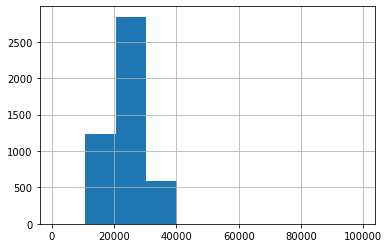

In [266]:
df['MonthlyIncome'].hist(bins=10)

I would like to see the differences between people who take products vs. those who did not take it.

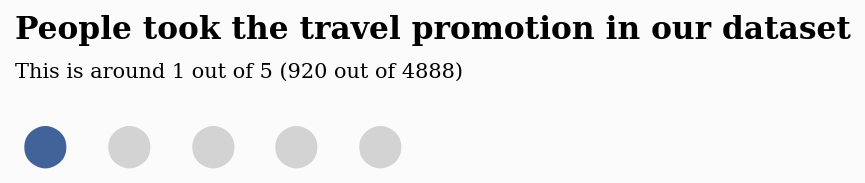

In [317]:
from pywaffle import Waffle

fig = plt.figure(figsize=(3,2), dpi=150, facecolor=background_color,
                FigureClass=Waffle,
                rows = 1, values=[1, 4],
                colors = ['#41639a', 'lightgray'],
                characters='⬤',
                font_size=20, vertical=True)

fig.text(0.035, 0.78, 'People took the travel promotion in our dataset', fontfamily='serif',
        fontsize=15, fontweight='bold')
fig.text(0.035, 0.65, 'This is around 1 out of 5 (920 out of 4888)', fontfamily='serif', fontsize=10)
plt.show()

In [320]:
def HistPlots(df, xVar, ax):
    """ Function to create histograms for numerical variables
    Args: 
        df - dataframe
        xVar - a list for numerical variables
        ax - ax for each graph 
    """
    sns.kdeplot(take[xVar], ax=ax, color='#41639a', alpha=0.4, shade=True, label='Take')
    sns.kdeplot(nottake[xVar], ax=ax, color="gray", alpha=0.4, shade=True, label='NotTake')
    ax.grid(which='major', color='lightgray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', 
                color='#323232', loc='left')
    ax.legend(loc=1)
    ax.set_ylabel(' ')

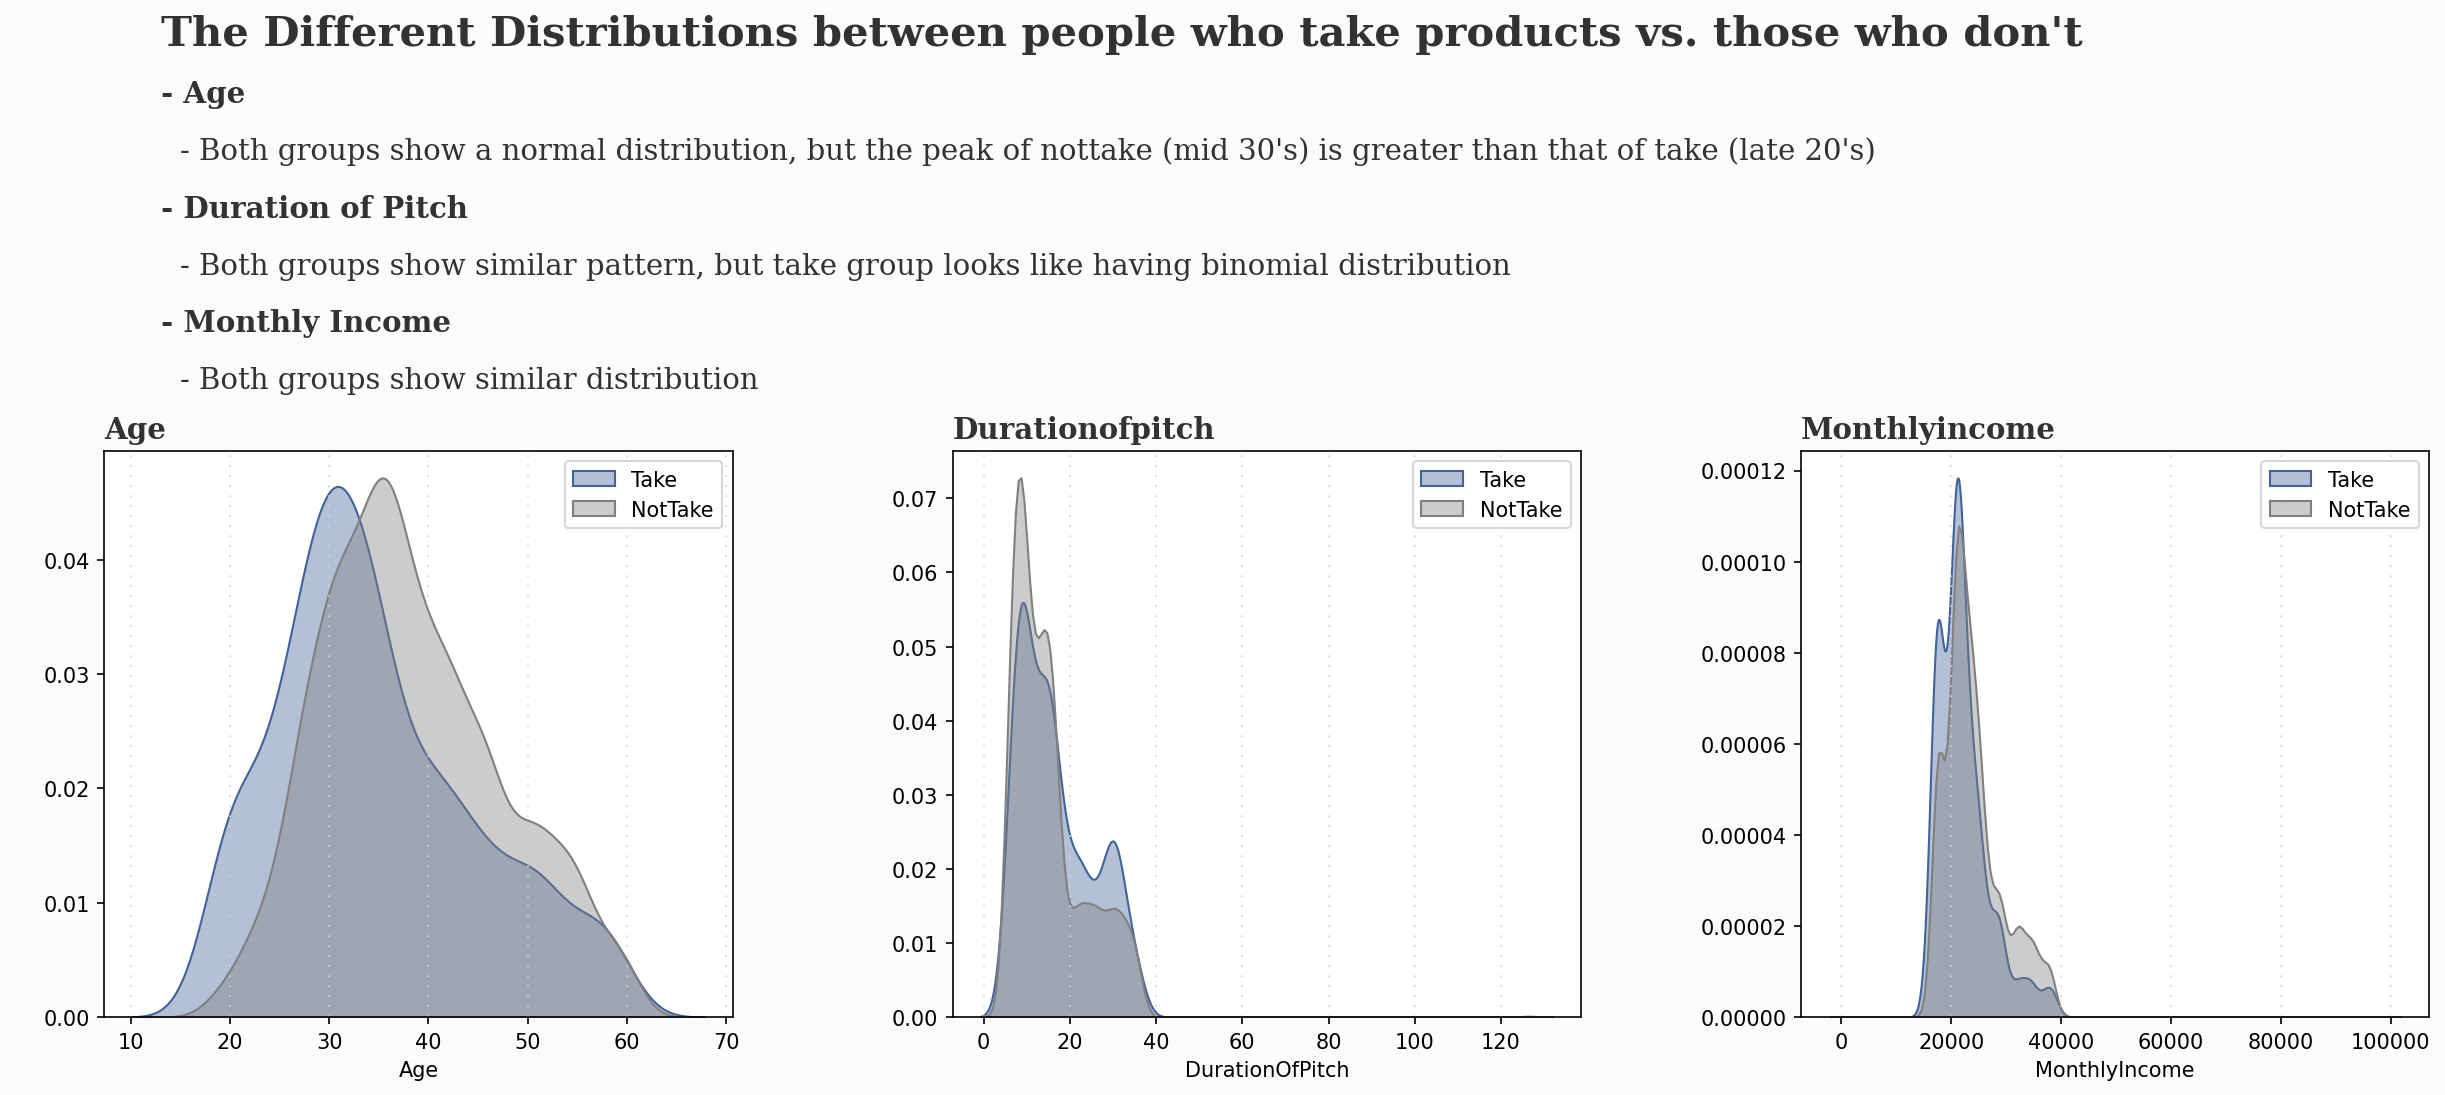

In [321]:
take = df[df['ProdTaken']==1]
nottake = df[df['ProdTaken']==0]

background_color = '#fbfbfb'

fig = plt.figure(figsize=(20, 5), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.35, hspace=0.5)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[0,2])]

num_lists = ['Age', 'DurationOfPitch', 'MonthlyIncome']

for ax, xVar in zip(axes, num_lists):
    HistPlots(df, xVar, ax)


# Add observations
axes[0].text(13, 0.085, "The Different Distributions between people who take products vs. those who don't",
            fontsize=20, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(13, 0.080, '- Age',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(15, 0.075, "- Both groups show a normal distribution, but the peak of nottake (mid 30's) is greater than that of take (late 20's)",
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(13, 0.070, '- Duration of Pitch',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')

axes[0].text(15, 0.065, '- Both groups show similar pattern, but take group looks like having binomial distribution',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(13, 0.060, '- Monthly Income',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(15, 0.055, '- Both groups show similar distribution',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232');
    

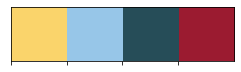

In [308]:
sns.palplot(['#fad46b', "#97c6e8", '#264D58', '#9b1b30'])

Bar Charts for categorical variables

In [322]:
def barPerc(df, xVar, ax):
    """
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')
            
def GrpSubplots(df, xVar, ax, axis=None, ticklabels=None):
    """ Create subplots based on x variables """
    df.groupby([xVar, 'ProdTaken']).size().unstack('ProdTaken').apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                                  width=0.9, 
                                                                                                                  color=['#41639a', '#9e9494'], 
                                                                                                                  ax=ax);
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='lightgray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.get_legend().remove()
    
    barPerc(df, xVar, ax)

In [323]:
df['PreferredPropertyStar'].unique()

array([3, 4, 5, 'Unknown'], dtype=object)

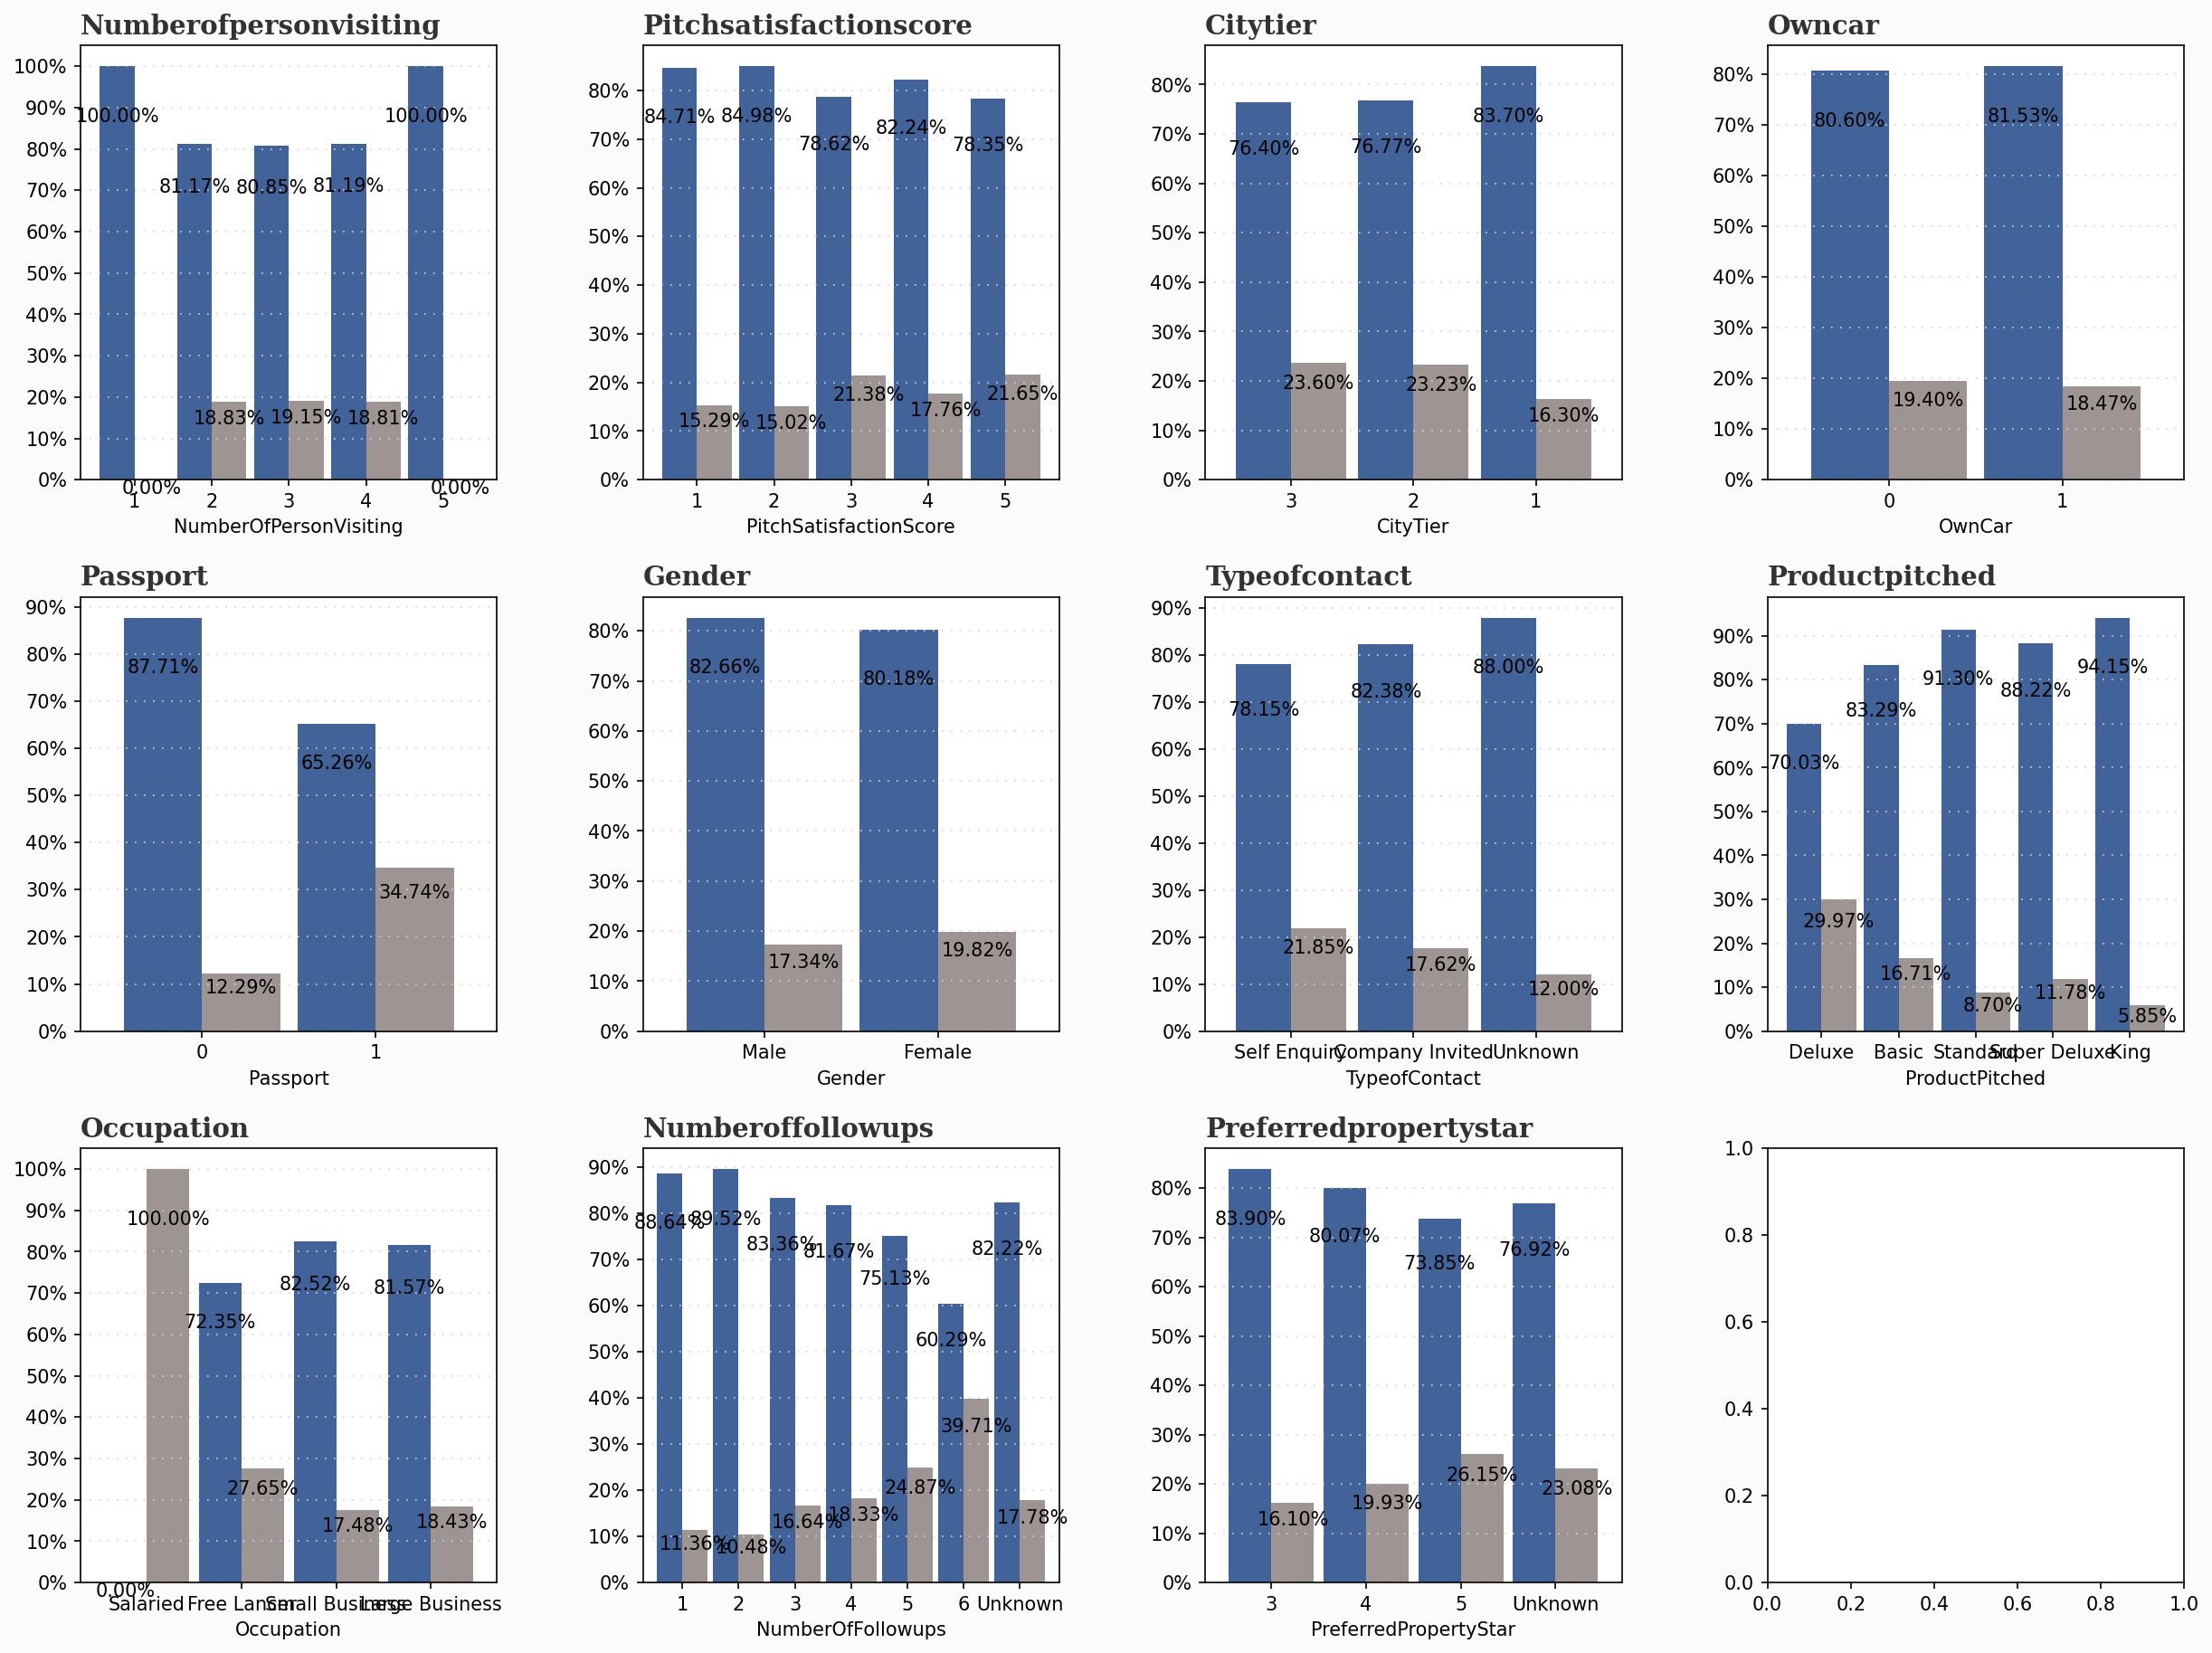

In [324]:
cats = ['NumberOfPersonVisiting', 'PitchSatisfactionScore', 'CityTier', 'OwnCar', 
             'Passport', 'Gender', 'TypeofContact', 'ProductPitched','Occupation',
            'NumberOfFollowups', 'PreferredPropertyStar']

background_color='#fbfbfb'

fig = plt.figure(figsize=(20,15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 4)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[0,2]),
        fig.add_subplot(gs[0,3]),
        fig.add_subplot(gs[1,0]),
        fig.add_subplot(gs[1,1]),
        fig.add_subplot(gs[1,2]),
        fig.add_subplot(gs[1,3]),
        fig.add_subplot(gs[2,0]),
        fig.add_subplot(gs[2,1]),
        fig.add_subplot(gs[2,2]),
        fig.add_subplot(gs[2,3])]

# ticklabels as list
tlabs = [[1, 2, 3, 4, 5]]*2 + [[3, 2, 1]] + [[0, 1]]*2 + [['Male', 'Female']] + [['Self Enquiry', 'Company Invited', 'Unknown']]+ [['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']] + [['Salaried', 'Free Lancer', 'Small Business', 'Large Business']]+ [[1, 2, 3, 4, 5, 6, 'Unknown']] + [[3, 4, 5, 'Unknown']]

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

I don't like the color choice, and think how to use the last blank graph